In [1]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler
import keras.optimizers
#from keras.optimizers import RMSprop, SGD
from matplotlib import pyplot as plt
import numpy as np
import pickle

Using TensorFlow backend.


In [2]:
#Graphing Function
#Plotting Function
def plot_fig(identity, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
    
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig(identity+'_accuracy.png')
    plt.close(fig)

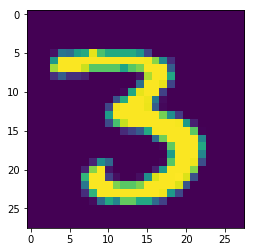

60000 train samples
10000 test samples


In [3]:
num_classes=10
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
fig = plt.imshow(x_train[12])
plt.show()
#plt.savefig('mnist-example.png')
plt.imsave('mnist-example1.png',x_train[10])
plt.imsave('mnist-example2.png',x_train[11])
plt.imsave('mnist-example3.png',x_train[12])

#Process Data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Learning Rates


# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))
        print('epoch complete')
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 1.0
    #lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    #lrate = np.random.uniform(0,1) #Uniform Distribution Bounded
    lrate = np.random.triangular(0,0.5,1) #Triangular Distribution
    #lrate = np.random.normal #Standard Normal Distribution
    #lrate = np.random.logseries(0.5) #Log Series
    #lrate = np.random.beta(0.5,0.5) #Beta Distribution
    return(lrate)



[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0

lr: 0.35661626127556023
epoch complete
lr: 0.27016056755011336
epoch complete
lr: 0.9129378971699025
epoch complete
lr: 0.8391487425748522
epoch complete
lr: 0.653923321021548
epoch complete
lr: 0.8837418958006833
epoch complete
lr: 0.9176909655373913
epoch complete
lr: 0.7359986026363505
epoch complete
lr: 0.29865274014544607
epoch complete
lr: 0.8335324502017651
epoch complete
lr: 0.5278129216318932
epoch complete
lr: 0.845417143305988
epoch complete
lr: 0.806224326182107
epoch complete
lr: 0.49387080769695796
epoch complete
lr: 0.49085398052172274
epoch complete
lr: 0.6505082635806523
epoch complete
lr: 0.3433729693490059
epoch complete
lr: 0.5782483512610678
epoch complete
lr: 0.45036586634018355
epoch complete
lr: 0.3731998218298922
epoch complete
lr: 0.12214152969139924
epoch complete
lr: 0.40905312937611354
epoch complete
lr: 0.46067335514501073
epoch complete
lr: 0.41822193241106226
epoch complete
lr: 0.2486286718324596
epoch complete
lr: 0.8939271510194164
epoch complete
lr: 0

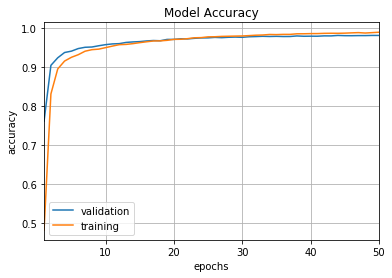

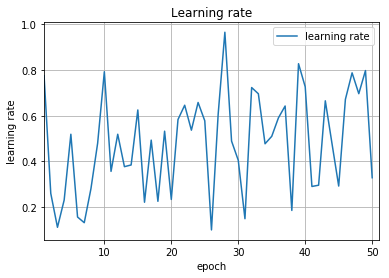

0 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.713814262070593
epoch complete
lr: 0.47054833432809245
epoch complete
lr: 0.9028532326640278
epoch complete
lr: 0.4223716638414844
epoch complete
lr: 0.3299493808640634
epoch complete
lr: 0.3916999478692603
epoch complete
lr: 0.7361839218642199
epoch complete
lr: 0.474919561737275
epoch complete
lr: 0.27015579063256395
epoch complete
lr: 0.6389966392436304
epoch complete
lr: 0.4400768898880276
epoch complete
lr: 0.32423255664624573
epoch complete
lr: 0.6344240828094394
epoch complete
lr: 0.27673277410419145
epoch complete
lr: 0.5006197124433605
epoch complete
lr: 0.6429203465237168
epoch complete
lr: 0.4131455998730888
epoch complete
lr: 0.298257444424555
epoch complete
lr: 0.7450513223891776
epoch complete
lr: 0.2843050772454201
epoch complete
lr: 0.6282411651904352
epoch complete
lr: 0.5601463536479778
epoch complete
lr: 0.38272873456724943
epoch complete
lr: 0.30982648617986536
epoch complete
lr: 0.39118339156387333
epoch complete
lr: 0.3714794954305258
epoch complete
lr: 0.43

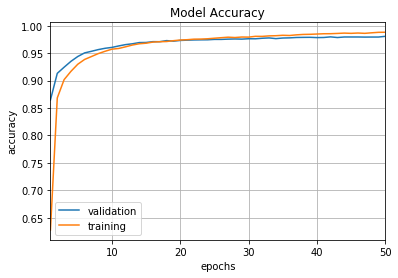

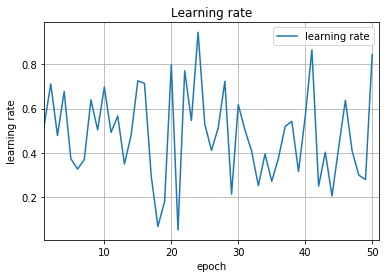

1 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.6104350733290633
epoch complete
lr: 0.19430678158164025
epoch complete
lr: 0.6590609767501452
epoch complete
lr: 0.56846078063109
epoch complete
lr: 0.31310161227086164
epoch complete
lr: 0.7668354083353204
epoch complete
lr: 0.5038158976685936
epoch complete
lr: 0.3020611595615121
epoch complete
lr: 0.6887621632811776
epoch complete
lr: 0.5112673651904711
epoch complete
lr: 0.49083269665249807
epoch complete
lr: 0.5033059643897673
epoch complete
lr: 0.6251461202608635
epoch complete
lr: 0.6928026101779514
epoch complete
lr: 0.5385907294753276
epoch complete
lr: 0.38099293733829287
epoch complete
lr: 0.28464423597141103
epoch complete
lr: 0.878578886694992
epoch complete
lr: 0.49148364775241327
epoch complete
lr: 0.4216600475213625
epoch complete
lr: 0.4282504989337258
epoch complete
lr: 0.1678140206907361
epoch complete
lr: 0.4231468587666232
epoch complete
lr: 0.8554542731222203
epoch complete
lr: 0.8725245882475426
epoch complete
lr: 0.16183524566093438
epoch complete
lr: 0.30

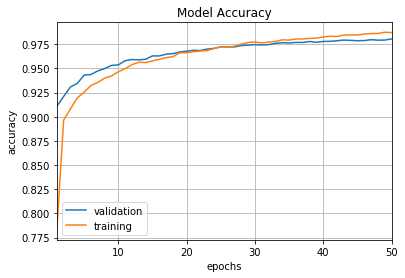

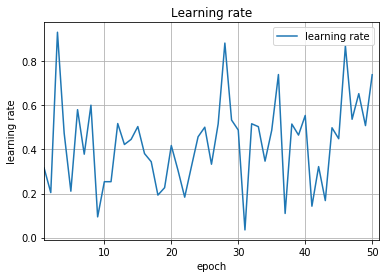

2 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.45158985968983173
epoch complete
lr: 0.5602759844252823
epoch complete
lr: 0.5958660429073148
epoch complete
lr: 0.271011570867681
epoch complete
lr: 0.5392272123086664
epoch complete
lr: 0.7815208946913259
epoch complete
lr: 0.6921814068592294
epoch complete
lr: 0.7665076199539378
epoch complete
lr: 0.8415769197225901
epoch complete
lr: 0.8210467448525294
epoch complete
lr: 0.8878228531804466
epoch complete
lr: 0.6761004822463124
epoch complete
lr: 0.7181346339290621
epoch complete
lr: 0.7980551993069511
epoch complete
lr: 0.5629530808855212
epoch complete
lr: 0.7979989738791281
epoch complete
lr: 0.23110418421708076
epoch complete
lr: 0.6464221748632581
epoch complete
lr: 0.41855013331268826
epoch complete
lr: 0.20232040381498112
epoch complete
lr: 0.45120723933179674
epoch complete
lr: 0.8104831213018701
epoch complete
lr: 0.5361758848809592
epoch complete
lr: 0.8132538030923835
epoch complete
lr: 0.8416703245058172
epoch complete
lr: 0.37556182961290907
epoch complete
lr: 0.5

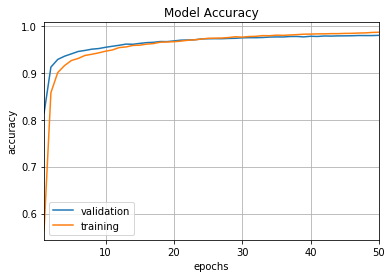

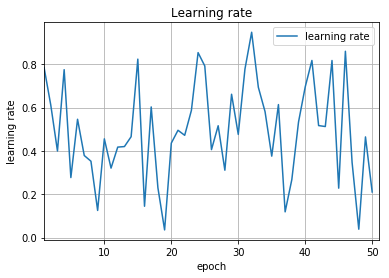

3 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.6060372198343125
epoch complete
lr: 0.5957336668644533
epoch complete
lr: 0.6499141445512491
epoch complete
lr: 0.5166005720488944
epoch complete
lr: 0.3382263652896976
epoch complete
lr: 0.788961430126893
epoch complete
lr: 0.5501776667582416
epoch complete
lr: 0.27038750505301484
epoch complete
lr: 0.4493804400722393
epoch complete
lr: 0.12057751630255752
epoch complete
lr: 0.5289302980682471
epoch complete
lr: 0.33487672358821857
epoch complete
lr: 0.20255038755731863
epoch complete
lr: 0.4349380064523823
epoch complete
lr: 0.5206555599931566
epoch complete
lr: 0.34302144379368243
epoch complete
lr: 0.6172396353057392
epoch complete
lr: 0.5496808256663313
epoch complete
lr: 0.25794501730016833
epoch complete
lr: 0.5235645904442405
epoch complete
lr: 0.340866566532971
epoch complete
lr: 0.8659208936515557
epoch complete
lr: 0.2688238538176851
epoch complete
lr: 0.26957277058678575
epoch complete
lr: 0.2040626344268056
epoch complete
lr: 0.5911854520004861
epoch complete
lr: 0.6

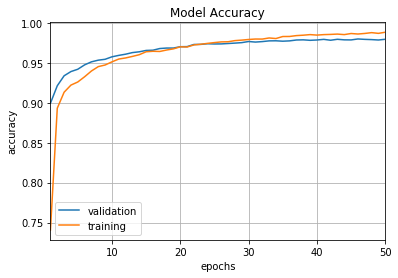

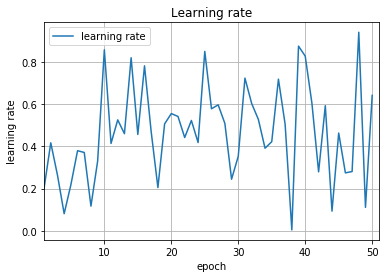

4 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.25526133989388494
epoch complete
lr: 0.09498043837387536
epoch complete
lr: 0.27309855777346764
epoch complete
lr: 0.8393787043699252
epoch complete
lr: 0.580213195878948
epoch complete
lr: 0.34936351433235757
epoch complete
lr: 0.04521638813747195
epoch complete
lr: 0.9438179861813443
epoch complete
lr: 0.45885500853391503
epoch complete
lr: 0.6219168866412292
epoch complete
lr: 0.22715366530932302
epoch complete
lr: 0.46868996363841364
epoch complete
lr: 0.16100278118475805
epoch complete
lr: 0.2946729723470313
epoch complete
lr: 0.39808406750270975
epoch complete
lr: 0.25740317816266883
epoch complete
lr: 0.32884869136437983
epoch complete
lr: 0.6366135989923524
epoch complete
lr: 0.17255589796835513
epoch complete
lr: 0.906172113640822
epoch complete
lr: 0.4668202414788636
epoch complete
lr: 0.33096751719994766
epoch complete
lr: 0.3494191355797761
epoch complete
lr: 0.43458713828031575
epoch complete
lr: 0.8095598102836798
epoch complete
lr: 0.5132990353853977
epoch complete

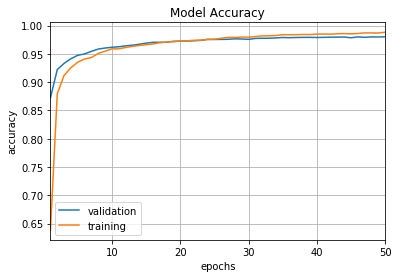

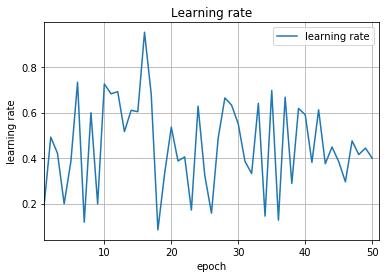

5 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.40791693451885747
epoch complete
lr: 0.258443844733117
epoch complete
lr: 0.3701439536120668
epoch complete
lr: 0.28729602961112033
epoch complete
lr: 0.6609137122503057
epoch complete
lr: 0.6704060578682302
epoch complete
lr: 0.5134692841753601
epoch complete
lr: 0.6192368352386723
epoch complete
lr: 0.946894732360482
epoch complete
lr: 0.35291186872719843
epoch complete
lr: 0.64777809445434
epoch complete
lr: 0.5918108679339056
epoch complete
lr: 0.3299530049898513
epoch complete
lr: 0.5134670534827357
epoch complete
lr: 0.508172977332326
epoch complete
lr: 0.8646368175210727
epoch complete
lr: 0.42408281486266175
epoch complete
lr: 0.4354102887666381
epoch complete
lr: 0.6932601171101611
epoch complete
lr: 0.8863071965167865
epoch complete
lr: 0.05197586680698806
epoch complete
lr: 0.6559314437684894
epoch complete
lr: 0.42642673584523855
epoch complete
lr: 0.24759744162765587
epoch complete
lr: 0.8952894871014019
epoch complete
lr: 0.513334158299399
epoch complete
lr: 0.55178

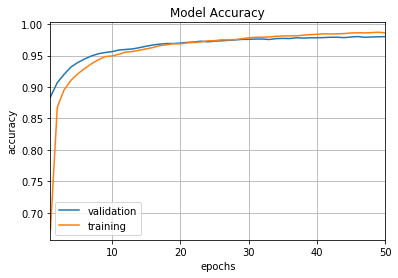

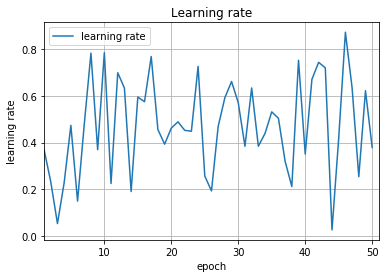

6 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.625357048476932
epoch complete
lr: 0.6895706978949764
epoch complete
lr: 0.5056348604931216
epoch complete
lr: 0.11116494935176158
epoch complete
lr: 0.6840381145495729
epoch complete
lr: 0.5561398113689349
epoch complete
lr: 0.1128614570635886
epoch complete
lr: 0.4115081476898091
epoch complete
lr: 0.4266452866551332
epoch complete
lr: 0.8639315980078052
epoch complete
lr: 0.06306772459212072
epoch complete
lr: 0.6288389299406771
epoch complete
lr: 0.553661632658937
epoch complete
lr: 0.7874451881833372
epoch complete
lr: 0.5962576228281944
epoch complete
lr: 0.39926499102991464
epoch complete
lr: 0.5713538423515239
epoch complete
lr: 0.38569583363203813
epoch complete
lr: 0.2470453939214069
epoch complete
lr: 0.8749586670836813
epoch complete
lr: 0.3315690546466678
epoch complete
lr: 0.05394755873882833
epoch complete
lr: 0.6060790507138818
epoch complete
lr: 0.6972590434670305
epoch complete
lr: 0.5134895824881363
epoch complete
lr: 0.6436287101515299
epoch complete
lr: 0.413

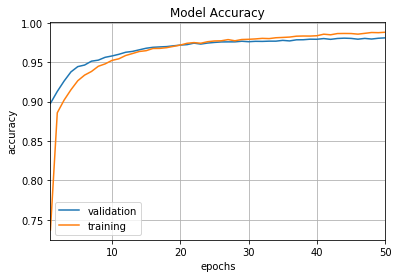

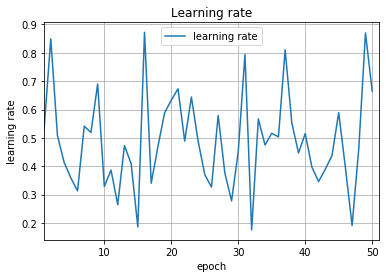

7 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.4557709788813021
epoch complete
lr: 0.28293518724457806
epoch complete
lr: 0.6404459022322464
epoch complete
lr: 0.3224349137291992
epoch complete
lr: 0.7219755395558137
epoch complete
lr: 0.7958676911937542
epoch complete
lr: 0.3707190102042769
epoch complete
lr: 0.4482311433545095
epoch complete
lr: 0.761329333553043
epoch complete
lr: 0.8464332118606663
epoch complete
lr: 0.46175324203567075
epoch complete
lr: 0.5460015294965488
epoch complete
lr: 0.825777972913106
epoch complete
lr: 0.44891246736825924
epoch complete
lr: 0.07132146908036908
epoch complete
lr: 0.10247029103195184
epoch complete
lr: 0.2195575677117293
epoch complete
lr: 0.3785708095152303
epoch complete
lr: 0.43022538432646573
epoch complete
lr: 0.14974381753953536
epoch complete
lr: 0.7356922120505882
epoch complete
lr: 0.5678690830337589
epoch complete
lr: 0.47392595402649335
epoch complete
lr: 0.2195955519883806
epoch complete
lr: 0.7635335833539951
epoch complete
lr: 0.2669133097104159
epoch complete
lr: 0.

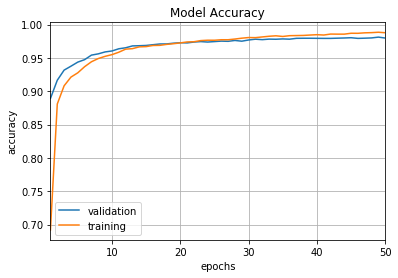

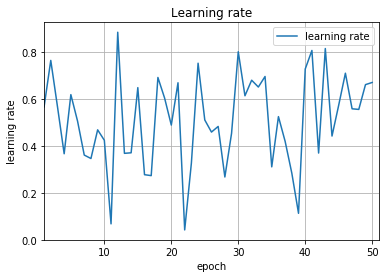

8 Complete
[array([[ 0.04045932,  0.03014778, -0.05395085, ..., -0.0265603 ,
        -0.06797015,  0.04132435],
       [ 0.0323295 , -0.06156345,  0.04380944, ..., -0.0513295 ,
         0.01277255,  0.05407738],
       [ 0.03364889,  0.04805643,  0.02008962, ...,  0.03593016,
        -0.04270403,  0.06212938],
       ..., 
       [ 0.04504235,  0.06577076, -0.04492702, ..., -0.01310821,
        -0.05994209, -0.03663909],
       [ 0.00522865, -0.06398395,  0.01149733, ...,  0.02461017,
        -0.03791013,  0.04420398],
       [-0.01271584, -0.0538175 ,  0.06545508, ..., -0.01888941,
        -0.00182088,  0.0624886 ]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

lr: 0.5023754145764843
epoch complete
lr: 0.687990462706439
epoch complete
lr: 0.6011010162212337
epoch complete
lr: 0.30009711890919305
epoch complete
lr: 0.5998802895426731
epoch complete
lr: 0.7128813475869986
epoch complete
lr: 0.6675766175451132
epoch complete
lr: 0.21350328290724427
epoch complete
lr: 0.4187097587297628
epoch complete
lr: 0.41468347668945155
epoch complete
lr: 0.34771436315827076
epoch complete
lr: 0.26687960544377753
epoch complete
lr: 0.3069208039155046
epoch complete
lr: 0.1428310330494195
epoch complete
lr: 0.6066559277937942
epoch complete
lr: 0.5914106732961959
epoch complete
lr: 0.5839272145443576
epoch complete
lr: 0.607899644760107
epoch complete
lr: 0.29714846582583077
epoch complete
lr: 0.41599920640324267
epoch complete
lr: 0.2721879500580242
epoch complete
lr: 0.4250309378724745
epoch complete
lr: 0.5194740896272687
epoch complete
lr: 0.4548838570434809
epoch complete
lr: 0.41112772873557835
epoch complete
lr: 0.6841484811444063
epoch complete
lr: 0.

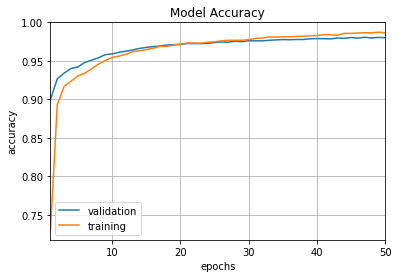

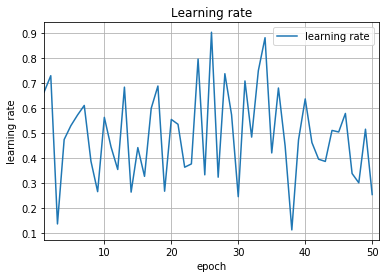

9 Complete


In [8]:
batch_size = 128
num_classes = 10
epochs = 50

#lrate = 0.1

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
#Compile Model
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])
#Save initial Weights for consistency
###NOTE TOGGLE COMMENT AFTER BATCH HAS STARTED
#model.save_weights('weights/deep_rand.h5')

for iteration in range(10):
    identity = 'triangle/triangle_'+str(iteration)+'_'
    #Load initial weights
    model.load_weights('weights/deep_rand.h5')
    #check weights
    for layer in model.layers:
        weights = layer.get_weights() # list of numpy arrays
        print(weights)
    #Train Model
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        verbose=0,
                        validation_data=(x_test, y_test))

    #test_score = model.evaluate(x_test, y_test, verbose=0)
    #train_score = model.evaluate(x_train, y_train, verbose=0)
    #print('Test loss:', score[0])
    #print('Test accuracy:', score[1])
    filename = identity+'trainHistoryDict'
    with open(filename, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

    plot_fig(identity, history)

    # plot learning rate
    fig = plt.figure()
    plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
    plt.xlabel("epoch")
    plt.xlim([1,epochs+1])
    plt.ylabel("learning rate")
    plt.legend(loc=0)
    plt.grid(True)
    plt.title("Learning rate")
    plt.show()
    filename_lr =identity+'learning_rate.png'
    fig.savefig(filename_lr)
    plt.close(fig)
    print(str(iteration)+' Complete')

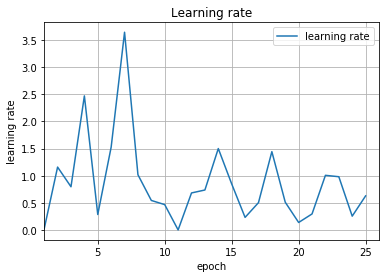

In [46]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('geo_learning-rate.jpg')
plt.close(fig)